# Сборный проект о продажах компьютерных игр

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и нужно спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. 

Шаг 1. Открыть файл с данными и изучить общую информацию

Шаг 2. Подготовка данных
- Заменить названия столбцов;
- Преобразовать данные в нужные типы. Опишисать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
- Объяснить, заполнение пропусков определённым образом;
- Описать причины, которые могли привести к пропускам;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Шаг 3. Исследовательский анализ данных
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. - За какой характерный срок появляются новые и исчезают старые платформы?
- Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Посмотреть на общее распределение игр по жанрам. 

Шаг 4. Портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Шаг 6. Общий вывод

Описание данных
- Name — название игры
-  Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Открываю файл с данными и изучаю общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt

**1.** Открываю файл `/datasets/games.csv`, сохраняю датафрейм в переменную `data`.

In [2]:
data=pd.read_csv('/datasets/games.csv') 

### Подготовка данных

**2.** Вывожу первые 5 строк датафрейма `data`.

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**3.** Вывожу основную информацию для датафрейма `data` с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**4.** Заменяю названия столбцов (привожу к нижнему регистру)

In [5]:
data.columns = map(str.lower, data.columns)

**5.** Преобразовываю данные в нужные типы и работаю с пропусками

year_of_release, critic_score - стоит преобразовать в int так как это целые значения
<br> user_score - преобразую в float64, так как столбец содержит цифровые обозначения с плавающей точкой

In [6]:
data['user_score'].unique() # посмотрим какие значения встречаются в столбце

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Есть 11 значений с "не определенным рейтингом", заменю значения на NaN для того что бы поменять формат

In [8]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float64')

In [9]:
data.info() # Проверю как все прошло

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Данные с пропущенными названиями игр нужно удалить, так как они не имеют смысла без этих данных. Данные с пропусками по годам удалю, их менее 2%, если оставить, будут мешать анализу

In [10]:
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['year_of_release'])

In [11]:
#data['year_of_release'] = data['year_of_release'].fillna(0)
data[['year_of_release', 'critic_score']] = data[['year_of_release', 'critic_score']].astype('Int64')
#data = data.astype({ "year_of_release": "int64", "critic_score": "int64"}, errors='ignore')

In [12]:
data['critic_score'].unique() 

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

In [13]:
data['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

critic_score, user_score - пропуски в столбцах заполнять не буду, так как это будет не корректно, игры могут быть еще не оценены критиками и пользователями или такой возможности впринципе не было на сайте откуда собирались данные.
rating - Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Для того, что бы корректно работать с данными по рейтингу поставлю заглушку "norating"

In [14]:
data['rating'] = data['rating'].fillna('norating') #ставлю заглушку

In [15]:
data['rating'].unique() # проверяю как встала заглушка

array(['E', 'norating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**6.** Считаю суммарные продажи во всех регионах и помещаю их в отдельный столбец.

In [16]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [17]:
data.duplicated().sum() # ищем явные дубликаты

0

Явных дубликатов не найдено

In [18]:
data.head() # Проверю как все прошло

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,norating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,norating,31.38


**Промежуточный вывод:** в целом датасет хорошо заполнен, но имеются существенные пропуски в данных по рейтингам. 
Пропуски по рейтингам скорее всего возникли в связи с тем что на страницах игры отсутствовал сбор данных значений и возможность оценивания. 
Организация рейтингования ESRB была основана в 1994 году, в связи с этим у ряда игр вышедших ранее года возникновения 
или на пару лет после, рейтинг может отсутствовать, так же рейтинг может отсутствовать у игр японского производства. 

### Исследовательский анализ данных

**Посмотрю сколько игр выпускалось в разные годы и все ли периоды важны**

In [19]:
data.describe() # посмотрю общую статистическую информацию

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


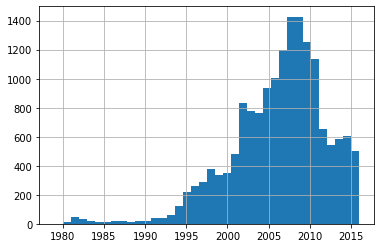

In [20]:
data['year_of_release'].hist(bins=38, range=(1979,2016)); # сколько игр выпускалось в разные годы

In [21]:
print('Продаж до 1995 года:', data.query('year_of_release < 1995')['year_of_release'].count())

Продаж до 1995 года: 486


Из графика видно, что до 1995 года выпускалось менее 200 игр в год. Всего с 1980 по 1994 было выпущено 486 игр, то есть менее 3% от общего количества, то есть эти данные можно считать не важными. Пик выпуска пришелся на 2005-2011 гг., когда каждый год выпускалось более 1000 игр.

**Изучу, как менялись продажи по платформам.** 

In [22]:
top_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)
top_platform # формирую сводную таблицу по сумме продаж в зависимости от платформы и сортирую по убыванию

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберу платформы с наибольшими суммарными продажами (топ 10) и построю распределение по годам. 

In [23]:
top10_platforms = top_platform.reset_index()
top10_platforms = top10_platforms.iloc[0:10]
top10_platforms = top10_platforms['platform'].unique()
top10_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

In [24]:
actual_data = data.query('year_of_release >= 1992') #возьмем все данные после 1992 года, так как ранее платформы топ 10 не использовались

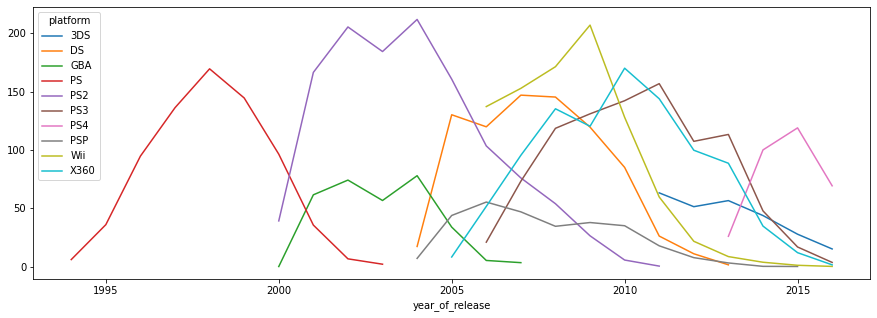

In [25]:
actual_data.query('platform in @top10_platforms').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5));

Из графика видно что требуется около 10 лет что бы исчезла старая платформа и появилась новая. 

Таким образом актуальным периодом для предсказания продаж на 2017 год можно считать период за 3 года, так как продажи платформ появившихся ранее как раз пойдут на спад и мы увидем все новые платформы, которые должны выйти на пик продаж. Отфильтрую датасет, удалю данные до 2014 года и проверю продажи только по отфильтрованным данным

In [26]:
data_predict = data.query('year_of_release >= 2014') #возьмем все данные после 2013 года

In [27]:
data_predict.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Построю графики продаж по всем платформам с 2014 по 2016

/tmp/ipykernel_48/2782917695.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


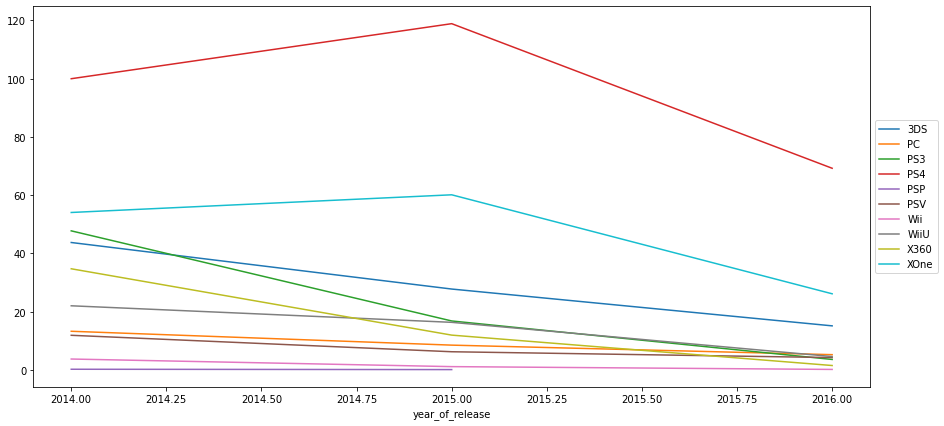

In [28]:
data_predict.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 7));
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

С 2014 по 2016 год лидируют по продажам PS4, XOne, 3DS с большим отрывом от остальных платформ, но если посмотреть на график, то можно заметить что время жизни всех платформ по сути закончилось и к 2016 году они вышли практически на минимум продаж. С 2014 по 2016 новых платформ вообще не появлялось. В 2013 появились PS4 и XOne, но и по ним уже наметился спад продаж. Так же стоит отметить как стабильную платформу PC в силу своей универсальности.

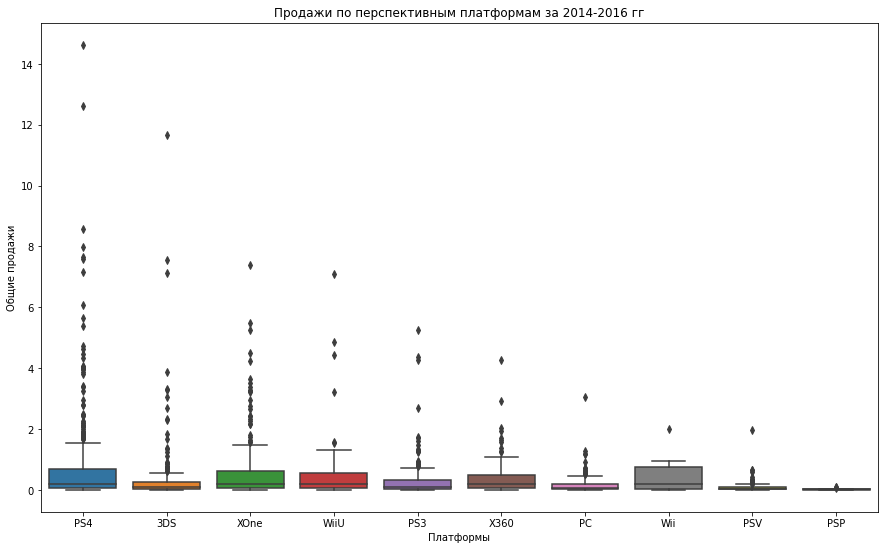

In [29]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = data_predict, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.show()

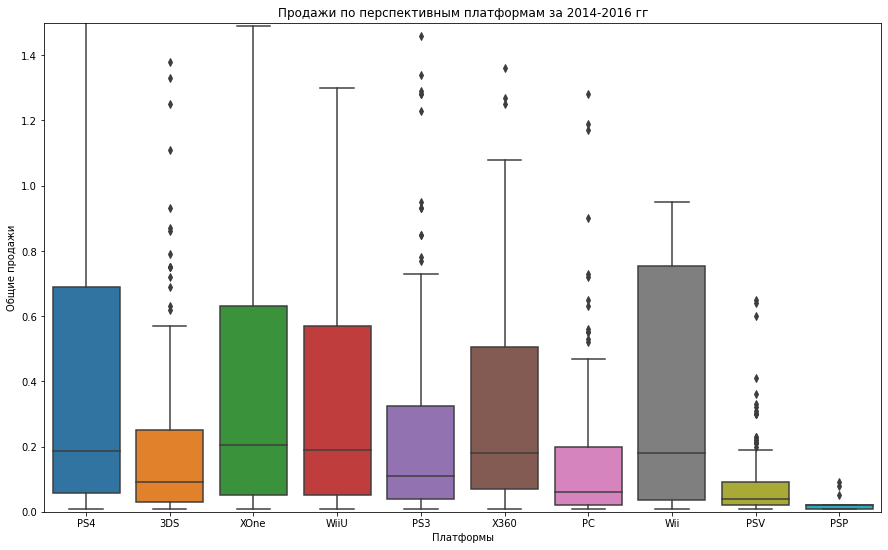

In [30]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = data_predict, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
        ylim=(0,1.5)))
plt.show()

Из диаграммы размаха видно что медиана у всех платформ лежит ниже серидины ящика, примерно на уровне 0,2 млн за некоторым исключением (PSP срок жизни закончился, PS3 вытесняется новой версией, PC традиционно ниже, PSV и 3DS-рынок преимущественно японский) то есть большая часть игр продается примерно на одном уровне, но у платформ-лидеров продаж есть существенные выбросы, игры - "звезды" которых продали очень много, у PS4 до 15 млн копий приблизительно. У платформ с минимальным уровнем продаж, выбросов фактически нет.

**Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Для того, что бы проверить как влияют на продажи внутри одной платформы отзывы пользователей и критиков, выберу платформы с максимальнм количеством отзывов.

In [31]:
data_predict.pivot_table(index='platform', values=['critic_score','user_score'] , aggfunc='count').sort_values(by = 'critic_score', ascending = False)

,critic_score,user_score
platform,,
PS4,237,242
XOne,155,165
PC,116,122
PSV,54,73
3DS,51,55
WiiU,43,48
PS3,36,98
X360,26,83
PSP,0,0


В лидерах по количеству оценок платформы  PS4, XOne, PC по ним и проведу анализ.  

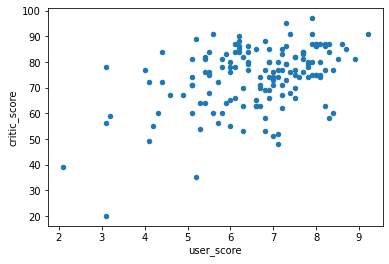

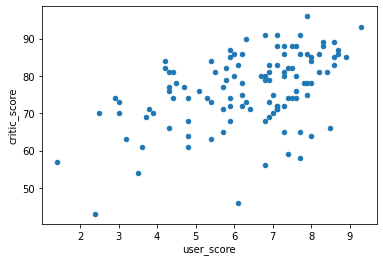

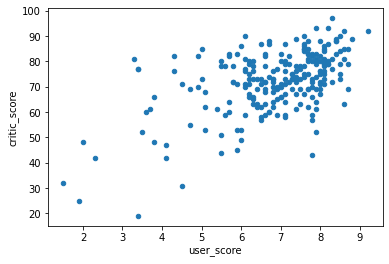

In [32]:
XOne = data_predict.query('platform == "XOne"')
XOne.plot(x='user_score', y='critic_score', kind='scatter'); # диаграмма рассеяния 
PC = data_predict.query('platform == "PC"')
PC.plot(x='user_score', y='critic_score', kind='scatter'); # диаграмма рассеяния 
PS4 = data_predict.query('platform == "PS4"')
PS4.plot(x='user_score', y='critic_score', kind='scatter'); # диаграмма рассеяния 

In [33]:
XOne_cor = XOne[['critic_score','user_score', 'total_sales']]
XOne_cor.corr()      # корреляция между отзывами и продажами

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


In [34]:
PC_cor = PC[['critic_score','user_score', 'total_sales']]
PC_cor.corr()  # корреляция между отзывами и продажами

,critic_score,user_score,total_sales
critic_score,1.000000,0.466099,0.174634
user_score,0.466099,1.000000,-0.071597
total_sales,0.174634,-0.071597,1.000000


In [35]:
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()     # корреляция между отзывами и продажами

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


**Вывод:** Оценки пользовавтелей и критиков имеют умеренную корреляцию между собой по всем платформам, самая "сильная" корреляция из имеющихся видна у PS4. По ней оценка пользователей и критиков максимально совпадала. Оценки критиков в целом слабо влияют на продажи особенно для компьютерных игр, мнение пользователей при покупке вообще не принимается в расчет.

Вероятно что подобная "картина" зависимости продаж от оценок будет наблюдатся для всех платформ. 

**Посмотрю на общее распределение игр по жанрам.** 

In [36]:
data_predict.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


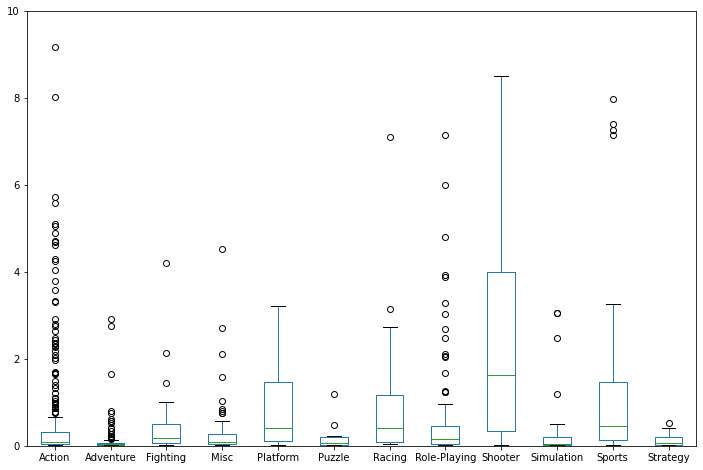

In [37]:
data_predict.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,10), figsize=(12,8));

Максимальные продажи в жанрах Action, Shooter, Role-Playing. Минимальные Puzzle, Adventure, Strategy. Похоже что в жанрах с максимальными продажами продается больше разнообразных игр, многие из которых популярны и хорошо продаются, а в жанрах снизкими продажами разнообразие меньше, либо все игры продаются примерно одинакого, суперпопулярных мало. Медиана везде смещена вниз, то есть основной объем игр на супер популярность не выходит. При этом медиана в жанре Shooter находится достаточно высоко, можно сказать что игры в этом жанре продаются хорошо и стабильно. Action напротив, его стабильные продажи находятся на низком уровни, как и у большинства других жанров, но когда выходит какая-то супер игра, ее продажи взлетают на высоту. Role-Playing похоже на Action, но супер игр в этом жанре выходит меньше.

 ### Портрет пользователя каждого региона

**Посмотрю самые популярные платформы (топ-5) в зависимости от региона.**

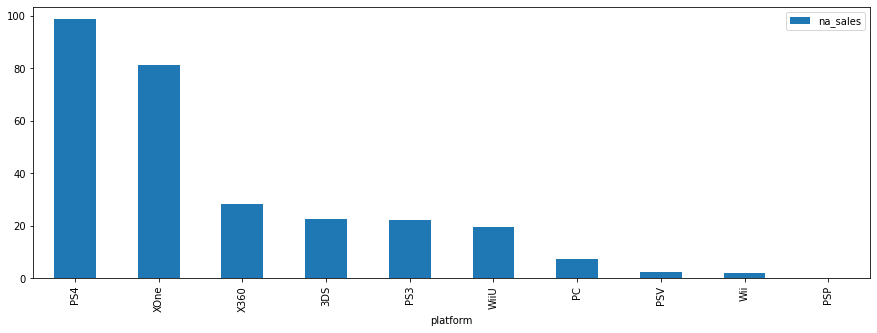

In [38]:
data_predict.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5));

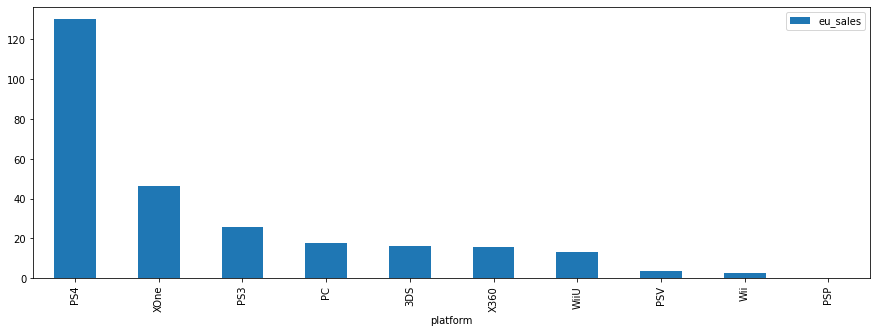

In [39]:
data_predict.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5));

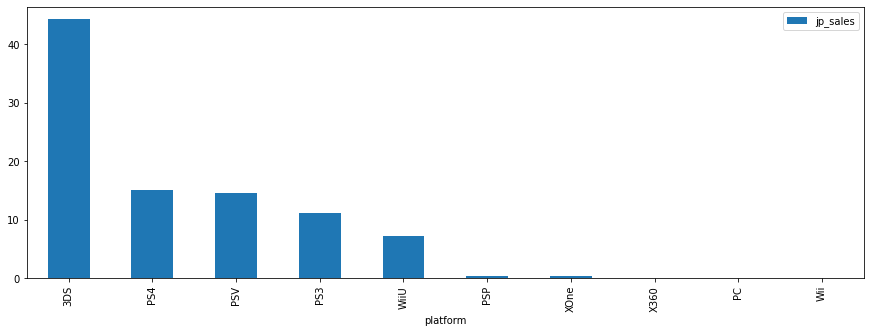

In [40]:
data_predict.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5));

В топе у пользователей Северной Америки платформа PS4, XOne, X360, 3DS, PS3. У Европейских пользователей порядок несколько другой PS4, XOne, PS3, PC, 3DS. В Японии в топе исключительно платформы собственного производства 3DS, PS4, PSV, PS3, WiiU. 
Большая часть популярных игровых платформ японские, при этом пользователи в Америке предпочитают "свою" платформу всем остальным, а Японцы исключительно японские, при этом с отрывом лидирует Nintendo DS карманная игровая консоль. В Европе смешанные предпочтения, при этом только в Европе в ТОП-5 есть PC.

**Самые популярные жанры (топ-5).**

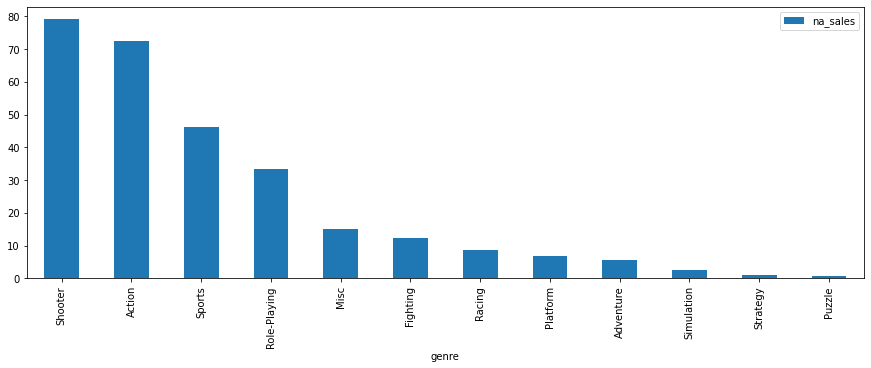

In [41]:
data_predict.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5));

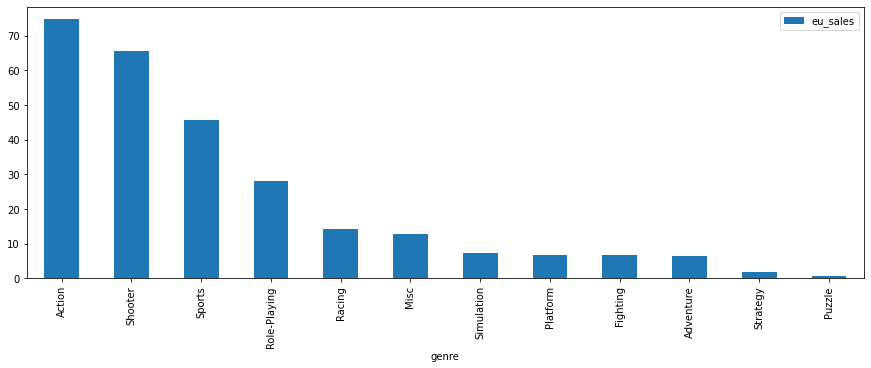

In [42]:
data_predict.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5));

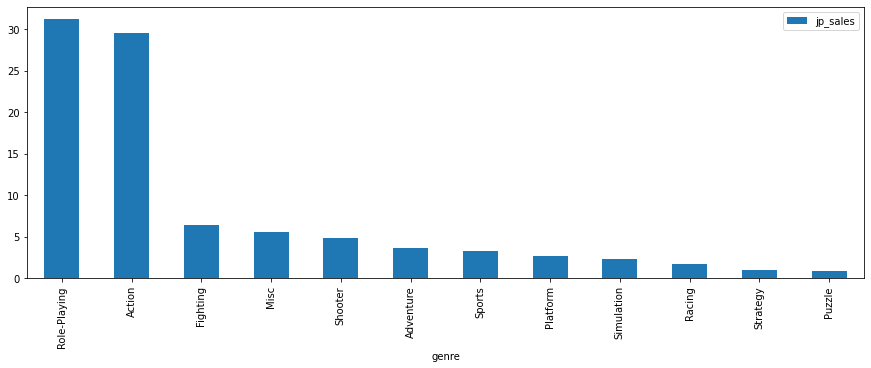

In [43]:
data_predict.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5));

Предпочтения американских и европейских пользователей в целом похожи, топ 4 у них одинаковые: Action, Shooter, Sports, Role-Playing на 5 месте у американцев Misc, у европейцев Racing. А вот Японские пользователи отличились, у них на первом месте Role-Playing что вероятнее всего объясняется распространением карманной платформы, следующие 2 место лидер в Европе и Америке Action,  Fighting замфкает тройку лидеров.  На 4 и 5 местах у японской аудитории Misc и Shooter. Основная масса игр в жанре шутер производятся на западе и не понятны\не близки японской аудитории.

**Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.**

In [44]:
ESRB = data_predict.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
norating,58.95,56.90,64.72


В Японии больше половины проданных игр не имеют рейтинга, это логично, так как ESRB создана для рейтингования развлекательного программного обеспечения в США и Канаде. А так как Японцы предпочитают карманные игровые консоли, то соответственно и игры собственного производства. В Европе и Америке распределение по рейтингам схожее, но есть и отличия. Лидер рейтинга «M» («Mature») — «Для взрослых» (шутеры как раз продают под этой маркировкой), на втором месте в Америке игры без рейтига, затем «E» («Everyone») — «Для всех», в Европе на втором месте Е, потом без рейтинга. 

### Проверяю гипотезы

Нам необходимо проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, для этого используем Т-тест. Нулевая гипотеза всегда предпологает что средние одинаковы. H1 это альтернативная гипотеза, которая должна противоречить нулевой. Выберем критический уровень значимости равным 5% это общепринятое значение. Если p-value больше этого уровня значит принимаем нулевую гипотезу.

**Первый тест**

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [45]:
XOne = data_predict[(data_predict['platform'] == 'XOne') & (data_predict['user_score'] > 0)]['user_score'] # сделаем выборку из DF
PC = data_predict[(data_predict['platform'] == 'PC') & (data_predict['user_score'] > 0)]['user_score']

In [46]:
alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, нет данных которые противоречат выводу

**Второй тест**

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

In [47]:
Action = data_predict[(data_predict['genre'] == 'Action') &  (data_predict['user_score'] > 0)]['user_score'] # сделаем выборку из DF
Sports = data_predict[(data_predict['genre'] == 'Sports') &  (data_predict['user_score'] > 0)]['user_score']

In [48]:
alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

### Общий вывод

Успешность продажи игры зависит от региона в котором продается игра, платформы, жанра, оценок критиков (чем выше оценка, тем лучше продажи).

В Северной Америке лучше всего продаются:
- платформы PS4, XOne
- жанры Shooter, Action, Sports, Role-Playing, Misc
- ESRB: norating, M, E

В Европе:
- платформы  PS4, XOne, PC
- жанры Action, Shooter, Sports, Role-Playing, Racing
- ESRB: norating, E, M

В Японии: 
- платформы  3DS, PS4
- жанры Role-Playing, Action,  Fighting, Misc и Shooter
- ESRB:  norating

В целом рынок игр по количеству продаж и выпуску новых релизов сжимается и есть все предпосылки, что он продолжит сжиматся и в 2017 году.
Самая популярная платформа - лидер по продажам игр это PS4 (при этом она в топе во всех изучаемых регионах), на нее стоит обратить внимание в первую очередь, если будем брать вторую платформу для рекламы, нужно решить на какой рынок мы хотим ориентироваться, если европейский и американский, то XOne, если Японский 3DS. По жанрам стот сделать ставку на Shooter, Action. Если ориентируемся на Японию, то Role-Playing. Action нужно брать в любом случае, так как он в топе на всех рынках. Так же при выборе игр стоит обращать внимание на отзывы критиков, по крайней мере не брать игры у которых отзывы совсем ниже 50, на оценки пользователей ориентироваться не нужно. Игры без рейтига ESRB хорошо продаются во всех регионах исследования, это не удивительно, Япония давно является одним из мировых лидеров по производству игр. Игры с рейтингами М и Е хорошо продаются на рынках Америки и Европы, но не в Японии.